## <b>Seguimiento de Objetos con Ultralytics YOLO</b>

El seguimiento de objetos (Object Tracking) amplía las capacidades de la detección de objetos no solo al identificar y localizar objetos dentro de cada fotograma de un video, sino también al mantener un identificador único para cada objeto detectado a lo largo de los fotogramas. Este proceso es crucial para aplicaciones que requieren monitorear el movimiento y el comportamiento de los objetos a lo largo del tiempo, como la vigilancia, el análisis deportivo y los sistemas avanzados de asistencia al conductor (ADAS).

### Diferencias entre Seguimiento y Detección de Objetos

* <b>Detección de Objetos</b> es el proceso de identificar objetos dentro de un único fotograma de imagen y clasificarlos en categorías predefinidas. Proporciona la ubicación del objeto, generalmente en forma de cajas delimitadoras (bounding boxes).

* <b>Seguimiento de Objetos</b>, por otro lado, sigue a los objetos identificados de un fotograma al siguiente. Esto implica detectar el objeto en el fotograma inicial y luego seguir su movimiento a través de los fotogramas subsiguientes, manteniendo un identificador coherente para cada objeto.

### Características del Seguimiento de Objetos con Ultralytics YOLO

Ultralytics YOLO ofrece capacidades mejoradas de seguimiento de objetos:

* <b>Seguimiento en Tiempo Real</b>: Capaz de rastrear objetos sin problemas en videos de alta velocidad de fotogramas, lo que lo hace adecuado para aplicaciones en tiempo real.

* <b>Soporte de Múltiples Rastreadores (Trackers)</b>: Ofrece opciones para seleccionar entre varios algoritmos de seguimiento establecidos.

* <b>Configuraciones de Rastreador Personalizables</b>: Permite el ajuste de los parámetros del rastreador para adaptarse a requisitos específicos, mejorando la flexibilidad y el rendimiento.

### Rastreadores Disponibles en Ultralytics YOLO

Ultralytics YOLO es compatible con diferentes algoritmos de seguimiento, incluyendo:

* <b> BoT-SORT</b>: Algoritmo de seguimiento predeterminado, adecuado para una variedad de necesidades de seguimiento. Se habilita con tracker='botsort.yaml'.

* <b>ByteTrack</b>: Conocido por su alto rendimiento, especialmente en escenas densas. Se habilita con tracker='bytetrack.yaml'.

### Implementación del Seguimiento de Objetos

Para aplicar el seguimiento de objetos con Ultralytics YOLO, puede utilizar los siguientes fragmentos de código:

### Carga y Ejecución de un Rastreador

```python
from ultralytics import YOLO

# Carga un modelo preentrenado
model = YOLO('yolov8n.pt')  # Sustituye con yolov8n-seg.pt o yolov8n-pose.pt cando se necesite

# Monitera el rendimiento en un video
results = model.track(source="path/to/video.mp4", show=True, tracker="botsort.yaml")  # Usa "bytetrack.yaml" para ByteTrack
```

Este código ejecutará el rastreador especificado en la fuente de video, mostrando los objetos seguidos en tiempo real.

### Configuración y Personalización

La configuración de seguimiento se puede personalizar de manera similar a la configuración de predicción, incluidos los umbrales de confianza (confidence) e IoU (Intersección sobre Unión):

```python
# Configuración de los parametros de monitoreo
results = model.track(source="path/to/video.mp4", conf=0.3, iou=0.5, show=True)
```

También puede utilizar una configuración de rastreador personalizada modificando un archivo YAML del directorio `ultralytics/cfg/trackers`:

In [17]:
# Instalaciónde librerías
# !pip install torch torchvision torchaudio
# !pip install ultralytics
# !pip install opencv-python

In [18]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [19]:
import cv2
import numpy as np
from ultralytics import YOLO

model = YOLO('yolov8n.pt') # Importación del modelo

Opcional: Cámara web local (No para Colab)

```python
from PIL import Image
import time
from IPython.display import Image as IPyImage

cap = cv2.VideoCapture(0)
time.sleep(1)  ### Permitir acceder a la camara

axes = None
NUM_FRAMES = 100  # Podemos cambiarlo en función de los frames que queremos
processed_imgs = []
for i in range(NUM_FRAMES):
    # Carga el frame a la camara
    ret, frame = cap.read()
    
    # RCorre el modelo
    results = model.track(frame, persist=True, verbose=False)
    result = results[0]
    
    annotated_image_bgr = result.plot()
    annotated_image_rgb = annotated_image_bgr[..., ::-1]  # Convierte de BGR a RGB
    
    img = Image.fromarray(np.uint8(annotated_image_rgb))
    processed_imgs.append(img)
    cv2.imshow("test", annotated_image_bgr)
    cv2.waitKey(1)

cap.release()
cv2.destroyAllWindows()
```

```python
## Crea el gif
processed_imgs[0].save('web_cam_tracking.gif',
                       format='GIF',
                       append_images=processed_imgs[1:],
                       save_all=True,
                       duration=100,
                       loop=0)
```

```python
#IPyImage('web_cam_tracking.gif', format='png', width=15 * 40, height=3 * 40)
```

#### Escena de tráfico

In [20]:
model = YOLO('yolov8n.pt') # Importación del modelo

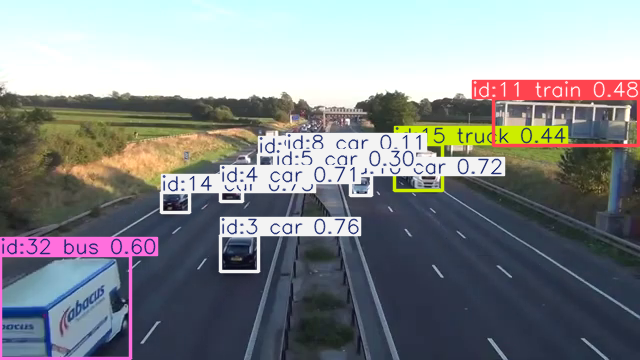

KeyboardInterrupt: 

In [21]:
def show_frame(img): # Función de muestra el frame y predice como se moverá el objeto
    """
    Muestra un frame de a imagen. Automaticamente detecta la ejecución del ambiente.
    Args:
        img (numpy.ndarray): El frame de la imagen a mostrar.
    """
    try:
        from google.colab.patches import cv2_imshow
        from IPython.display import clear_output
        clear_output(wait=True)
        cv2_imshow(img)
    except ImportError:
        cv2.imshow("YOLOv8 Tracking", img)  # Implica que se pueda usar tanto el colab como en local, no es necesario ambas importación, se podria primero importar y luego realziar el resto

traffic_url_1 = "https://github.com/ezponda/intro_deep_learning/raw/main/images/road_traffic_video_for_object_recognition_short.mp4" # Imporrtación del video


cap = cv2.VideoCapture(traffic_url_1)  # Carga del video

while cap.isOpened(): # Bucle para ir ejecutando mientras cap este abierto
    success, frame = cap.read()

    if success:
        results = model.track(frame, persist=True, verbose=False) # Aplica el modelo
        result = results[0]

        annotated_frame = result.plot() # Plotea los resultados
        show_frame(annotated_frame) # los muestra
        if cv2.waitKey(1) & 0xFF == ord('q'): # Para terminar el modelo hay que presionar q
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

In [22]:
print(result)

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [23]:
help(result)

Help on Results in module ultralytics.engine.results object:

class Results(ultralytics.utils.SimpleClass, ultralytics.utils.DataExportMixin)
 |  Results(orig_img: 'np.ndarray', path: 'str', names: 'dict[int, str]', boxes: 'torch.Tensor | None' = None, masks: 'torch.Tensor | None' = None, probs: 'torch.Tensor | None' = None, keypoints: 'torch.Tensor | None' = None, obb: 'torch.Tensor | None' = None, speed: 'dict[str, float] | None' = None) -> 'None'
 |
 |  A class for storing and manipulating inference results.
 |
 |  This class provides comprehensive functionality for handling inference results from various Ultralytics models,
 |  including detection, segmentation, classification, and pose estimation. It supports visualization, data export, and
 |  various coordinate transformations.
 |
 |  Attributes:
 |      orig_img (np.ndarray): The original image as a numpy array.
 |      orig_shape (tuple[int, int]): Original image shape in (height, width) format.
 |      boxes (Boxes | None): D

In [24]:
help(result.boxes)

Help on Boxes in module ultralytics.engine.results object:

class Boxes(BaseTensor)
 |  Boxes(boxes: 'torch.Tensor | np.ndarray', orig_shape: 'tuple[int, int]') -> 'None'
 |
 |  A class for managing and manipulating detection boxes.
 |
 |  This class provides comprehensive functionality for handling detection boxes, including their coordinates,
 |  confidence scores, class labels, and optional tracking IDs. It supports various box formats and offers methods for
 |  easy manipulation and conversion between different coordinate systems.
 |
 |  Attributes:
 |      data (torch.Tensor | np.ndarray): The raw tensor containing detection boxes and associated data.
 |      orig_shape (tuple[int, int]): The original image dimensions (height, width).
 |      is_track (bool): Indicates whether tracking IDs are included in the box data.
 |      xyxy (torch.Tensor | np.ndarray): Boxes in [x1, y1, x2, y2] format.
 |      conf (torch.Tensor | np.ndarray): Confidence scores for each box.
 |      cls (t

In [25]:
print(result.boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2., 2., 2., 6., 7., 2., 5.])
conf: tensor([0.7552, 0.7068, 0.2968, 0.1146, 0.3831, 0.7181, 0.4823, 0.4375, 0.7478, 0.5999])
data: tensor([[2.2094e+02, 2.3564e+02, 2.5834e+02, 2.7154e+02, 3.0000e+00, 7.5516e-01, 2.0000e+00],
        [2.2050e+02, 1.8337e+02, 2.4239e+02, 2.0166e+02, 4.0000e+00, 7.0678e-01, 2.0000e+00],
        [2.7575e+02, 1.6753e+02, 2.9229e+02, 1.8363e+02, 5.0000e+00, 2.9679e-01, 2.0000e+00],
        [2.8676e+02, 1.5152e+02, 3.0149e+02, 1.6387e+02, 8.0000e+00, 1.1464e-01, 2.0000e+00],
        [2.5814e+02, 1.5406e+02, 2.7491e+02, 1.6838e+02, 9.0000e+00, 3.8312e-01, 2.0000e+00],
        [3.5060e+02, 1.7573e+02, 3.7165e+02, 1.9530e+02, 1.0000e+01, 7.1809e-01, 2.0000e+00],
        [4.9347e+02, 9.8476e+01, 6.3891e+02, 1.4532e+02, 1.1000e+01, 4.8231e-01, 6.0000e+00],
        [3.9459e+02, 1.4497e+02, 4.4263e+02, 1.9038e+02, 1.5000e+01, 4.3749e-01, 7.0000e+00],
        [1.6142e+02, 1.9274e+02, 1.

In [26]:
print('Clases detectadas', result.boxes.cls.numpy())
print('Total clases', result.names)

Clases detectadas [          2           2           2           2           2           2           6           7           2           5]
Total clases {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'pot

### Pregunta 1: Conteo del Total de Apariciones de Camiones

Cuente el número total de apariciones de camiones a lo largo de todos los fotogramas del video. Los camiones se identifican con el índice de clase que aparece en `result.names`. Su tarea es completar el código de manera que cuente correctamente el número de veces que aparecen camiones en los fotogramas del video. Tome nota de cómo se procesan los resultados y cómo puede utilizar la información contenida en `result.boxes`.

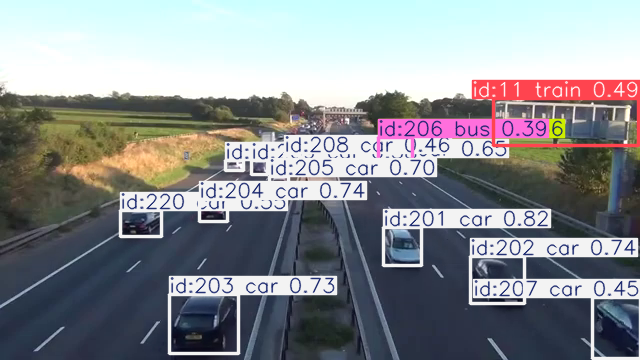

KeyboardInterrupt: 

In [28]:
from collections import Counter # Importación función Counter para poder contar el número de camiones

cap = cv2.VideoCapture(traffic_url_1)  # cargar el video del url
truck_counts = 0
truck_class_id = 7

while cap.isOpened(): # Bucle para ir aejecutando mientras el video este abierto
    success, frame = cap.read()
    if success:
        # Todos los objetos detectados en el frame
        results = model.track(frame, persist=True, verbose=False) # Aplicación del modelo
        result = results[0] # guardamos results[0] en result

        truck_boxes = [box for box in result.boxes if int(box.cls) == truck_class_id] # Filtra dentro de todos los objetos los que sean id 7 (camión)
        truck_counts += 1

        annotated_frame = result.plot() # Ploteamos
        show_frame(annotated_frame) # Visualziamos

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

In [29]:
print(f"Total aàriciones de camiones: {truck_counts}") # Nos salen 93 camiones pork cuenta todas las veces que aparece un camion (cada frame)
# Ahora vamos a realizarlo con camion con id igual

Total aàriciones de camiones: 12


### Pregunta 2: Conteo de Camiones Únicos en el Video

Modifique el código para contar el número de camiones únicos que aparecen a lo largo de todo el video. Esto implica hacer un seguimiento de los camiones individuales a través de los fotogramas. Cada camión detectado tiene un ID de seguimiento único (tracking ID) cuando el seguimiento está habilitado en YOLOv8. Utilice estos IDs para identificar camiones únicos durante todo el video. Implemente las modificaciones necesarias para contar estas instancias únicas.

In [36]:
from collections import Counter

cap = cv2.VideoCapture(traffic_url_1) # Carga del video
unique_truck_ids = set()  # Guardad los camiones unicos
truck_class_id = 7

while cap.isOpened(): # Mientras el video este abierto, ejecuta el siguiente codigo
    success, frame = cap.read() # lee el video
    if success: # Si hay success, ejectua lo sigueinte

        # Detecta todos los objetos en el frame
        results = model.track(frame, persist=True, verbose=False) # Aplicación del modelo
        result = results[0] # Guardar en result results[0]

        # Detección de camiones id distinto
        for i, cls_id in enumerate(result.boxes.cls.tolist()):
            if cls_id == truck_class_id: # Cuando sean camiones
              _id = result.boxes.id[i].item() # irmprime el id de cada camion en variable id
              unique_truck_ids.add(_id) # los voy añadiendo a la lista de unique_trucks_id



        annotated_frame = result.plot() # Plotea la imagen
        show_frame(annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [37]:
print(f"Número de camiones únicos: {len(unique_truck_ids)}") # Hacemos la longitud de la lista de camiones unicos y nos dará el numero de ids distintos por camiones

Número de camiones únicos: 3
